# Exoplanet Hunting Using Machine Learning and NASA Database

### What is the Exoplanets?

### What is the flux for Exoplanets?

In [1]:
# Import all needed libraries
import os
import warnings
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the train NASA data and test NASA data
exo_train = pd.read_csv('C:\PythonScripts\Database-for-projects\Exoplanet-Hunting-Project\exoTrain.csv')
exo_test = pd.read_csv('C:\PythonScripts\Database-for-projects\Exoplanet-Hunting-Project\exoTest.csv')

In [3]:
exo_train.head(10)

,LABEL,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,2,93.85,83.81,20.10,-26.98,-39.56,-124.71,-135.18,-96.27,-79.89,...,-78.07,-102.15,-102.15,25.13,48.57,92.54,39.32,61.42,5.08,-39.54
1,2,-38.88,-33.83,-58.54,-40.09,-79.31,-72.81,-86.55,-85.33,-83.97,...,-3.28,-32.21,-32.21,-24.89,-4.86,0.76,-11.70,6.46,16.00,19.93
2,2,532.64,535.92,513.73,496.92,456.45,466.00,464.50,486.39,436.56,...,-71.69,13.31,13.31,-29.89,-20.88,5.06,-11.80,-28.91,-70.02,-96.67
3,2,326.52,347.39,302.35,298.13,317.74,312.70,322.33,311.31,312.42,...,5.71,-3.73,-3.73,30.05,20.03,-12.67,-8.77,-17.31,-17.35,13.98
4,2,-1107.21,-1112.59,-1118.95,-1095.10,-1057.55,-1034.48,-998.34,-1022.71,-989.57,...,-594.37,-401.66,-401.66,-357.24,-443.76,-438.54,-399.71,-384.65,-411.79,-510.54
5,2,211.10,163.57,179.16,187.82,188.46,168.13,203.46,178.65,166.49,...,-98.45,30.34,30.34,29.62,28.80,19.27,-43.90,-41.63,-52.90,-16.16
6,2,9.34,49.96,33.30,9.63,37.64,20.85,4.54,22.42,10.11,...,-58.56,9.93,9.93,23.50,5.28,-0.44,10.90,-11.77,-9.25,-36.69
7,2,238.77,262.16,277.80,190.16,180.98,123.27,103.95,50.70,59.91,...,-72.48,31.77,31.77,53.48,27.88,95.30,48.86,-10.62,-112.02,-229.92
8,2,-103.54,-118.97,-108.93,-72.25,-61.46,-50.16,-20.61,-12.44,1.48,...,43.92,7.24,7.24,-7.45,-18.82,4.53,21.95,26.94,34.08,44.65
9,2,-265.91,-318.59,-335.66,-450.47,-453.09,-561.47,-606.03,-712.72,-685.97,...,3671.03,2249.28,2249.28,2437.78,2584.22,3162.53,3398.28,3648.34,3671.97,3781.91


In [4]:
exo_test.head(10)

,LABEL,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,2,119.88,100.21,86.46,48.68,46.12,39.39,18.57,6.98,6.63,...,14.52,19.29,14.44,-1.62,13.33,45.50,31.93,35.78,269.43,57.72
1,2,5736.59,5699.98,5717.16,5692.73,5663.83,5631.16,5626.39,5569.47,5550.44,...,-581.91,-984.09,-1230.89,-1600.45,-1824.53,-2061.17,-2265.98,-2366.19,-2294.86,-2034.72
2,2,844.48,817.49,770.07,675.01,605.52,499.45,440.77,362.95,207.27,...,17.82,-51.66,-48.29,-59.99,-82.10,-174.54,-95.23,-162.68,-36.79,30.63
3,2,-826.00,-827.31,-846.12,-836.03,-745.50,-784.69,-791.22,-746.50,-709.53,...,122.34,93.03,93.03,68.81,9.81,20.75,20.25,-120.81,-257.56,-215.41
4,2,-39.57,-15.88,-9.16,-6.37,-16.13,-24.05,-0.90,-45.20,-5.04,...,-37.87,-61.85,-27.15,-21.18,-33.76,-85.34,-81.46,-61.98,-69.34,-17.84
5,1,14.28,10.63,14.56,12.42,12.07,12.92,12.27,3.19,8.47,...,3.86,-4.06,-3.56,-1.13,-7.18,-4.78,-4.34,7.67,-0.33,-7.53
6,1,-150.48,-141.72,-157.60,-184.60,-164.89,-173.87,-162.91,-167.04,-172.76,...,7.15,5.16,-9.08,-39.11,-32.31,-8.40,-16.80,-8.03,-12.73,-11.41
7,1,-10.06,-12.78,-13.16,-9.81,-18.91,-20.33,-22.85,-19.17,-17.97,...,21.49,30.63,24.19,33.00,35.70,35.89,-33.44,-30.83,-33.00,-20.15
8,1,454.66,440.60,382.29,361.63,298.63,253.29,155.86,110.38,31.71,...,-56.78,-61.64,-120.32,-65.39,-126.75,-78.18,-184.39,-142.31,-113.12,-111.78
9,1,187.40,209.60,199.91,179.62,171.21,161.84,163.02,171.61,113.53,...,-23.75,-35.72,-21.93,-16.47,-21.84,-26.64,-13.90,17.03,4.36,2.91


In [5]:
# the LABEL column has two categories: 1 - does not represents exoplanet; 2 - represents exoplanet.
# Convert to binary values for easier processing of data
binary_values = {2:1, 1:0}
exo_train.LABEL=[binary_values[item] for item in exo_train.LABEL]
exo_test.LABEL=[binary_values[item]for item in exo_test.LABEL]

In [6]:
# check the values in LABEL column
exo_train.head(10)

,LABEL,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,1,93.85,83.81,20.10,-26.98,-39.56,-124.71,-135.18,-96.27,-79.89,...,-78.07,-102.15,-102.15,25.13,48.57,92.54,39.32,61.42,5.08,-39.54
1,1,-38.88,-33.83,-58.54,-40.09,-79.31,-72.81,-86.55,-85.33,-83.97,...,-3.28,-32.21,-32.21,-24.89,-4.86,0.76,-11.70,6.46,16.00,19.93
2,1,532.64,535.92,513.73,496.92,456.45,466.00,464.50,486.39,436.56,...,-71.69,13.31,13.31,-29.89,-20.88,5.06,-11.80,-28.91,-70.02,-96.67
3,1,326.52,347.39,302.35,298.13,317.74,312.70,322.33,311.31,312.42,...,5.71,-3.73,-3.73,30.05,20.03,-12.67,-8.77,-17.31,-17.35,13.98
4,1,-1107.21,-1112.59,-1118.95,-1095.10,-1057.55,-1034.48,-998.34,-1022.71,-989.57,...,-594.37,-401.66,-401.66,-357.24,-443.76,-438.54,-399.71,-384.65,-411.79,-510.54
5,1,211.10,163.57,179.16,187.82,188.46,168.13,203.46,178.65,166.49,...,-98.45,30.34,30.34,29.62,28.80,19.27,-43.90,-41.63,-52.90,-16.16
6,1,9.34,49.96,33.30,9.63,37.64,20.85,4.54,22.42,10.11,...,-58.56,9.93,9.93,23.50,5.28,-0.44,10.90,-11.77,-9.25,-36.69
7,1,238.77,262.16,277.80,190.16,180.98,123.27,103.95,50.70,59.91,...,-72.48,31.77,31.77,53.48,27.88,95.30,48.86,-10.62,-112.02,-229.92
8,1,-103.54,-118.97,-108.93,-72.25,-61.46,-50.16,-20.61,-12.44,1.48,...,43.92,7.24,7.24,-7.45,-18.82,4.53,21.95,26.94,34.08,44.65
9,1,-265.91,-318.59,-335.66,-450.47,-453.09,-561.47,-606.03,-712.72,-685.97,...,3671.03,2249.28,2249.28,2437.78,2584.22,3162.53,3398.28,3648.34,3671.97,3781.91


In [7]:
exo_test.head(10)

,LABEL,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,1,119.88,100.21,86.46,48.68,46.12,39.39,18.57,6.98,6.63,...,14.52,19.29,14.44,-1.62,13.33,45.50,31.93,35.78,269.43,57.72
1,1,5736.59,5699.98,5717.16,5692.73,5663.83,5631.16,5626.39,5569.47,5550.44,...,-581.91,-984.09,-1230.89,-1600.45,-1824.53,-2061.17,-2265.98,-2366.19,-2294.86,-2034.72
2,1,844.48,817.49,770.07,675.01,605.52,499.45,440.77,362.95,207.27,...,17.82,-51.66,-48.29,-59.99,-82.10,-174.54,-95.23,-162.68,-36.79,30.63
3,1,-826.00,-827.31,-846.12,-836.03,-745.50,-784.69,-791.22,-746.50,-709.53,...,122.34,93.03,93.03,68.81,9.81,20.75,20.25,-120.81,-257.56,-215.41
4,1,-39.57,-15.88,-9.16,-6.37,-16.13,-24.05,-0.90,-45.20,-5.04,...,-37.87,-61.85,-27.15,-21.18,-33.76,-85.34,-81.46,-61.98,-69.34,-17.84
5,0,14.28,10.63,14.56,12.42,12.07,12.92,12.27,3.19,8.47,...,3.86,-4.06,-3.56,-1.13,-7.18,-4.78,-4.34,7.67,-0.33,-7.53
6,0,-150.48,-141.72,-157.60,-184.60,-164.89,-173.87,-162.91,-167.04,-172.76,...,7.15,5.16,-9.08,-39.11,-32.31,-8.40,-16.80,-8.03,-12.73,-11.41
7,0,-10.06,-12.78,-13.16,-9.81,-18.91,-20.33,-22.85,-19.17,-17.97,...,21.49,30.63,24.19,33.00,35.70,35.89,-33.44,-30.83,-33.00,-20.15
8,0,454.66,440.60,382.29,361.63,298.63,253.29,155.86,110.38,31.71,...,-56.78,-61.64,-120.32,-65.39,-126.75,-78.18,-184.39,-142.31,-113.12,-111.78
9,0,187.40,209.60,199.91,179.62,171.21,161.84,163.02,171.61,113.53,...,-23.75,-35.72,-21.93,-16.47,-21.84,-26.64,-13.90,17.03,4.36,2.91


In [ ]:
#Reduce memory


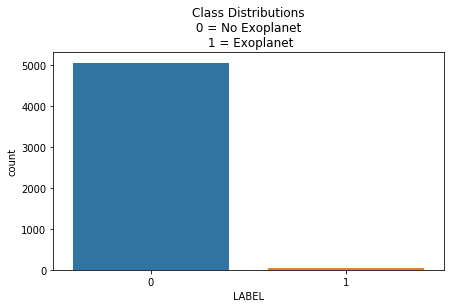

In [8]:
# Plot of Class Distribution
plt.figure(figsize=(7,4))
colors = ["0", "1"]
sns.countplot('LABEL', data=exo_train)
plt.title('Class Distributions\n 0 = No Exoplanet \n 1 = Exoplanet')
plt.show()

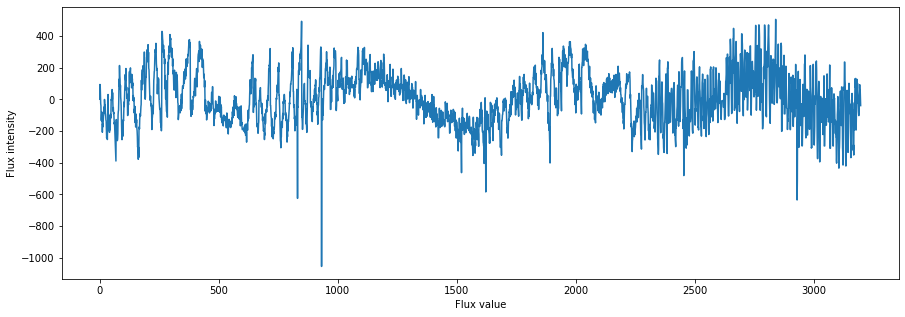

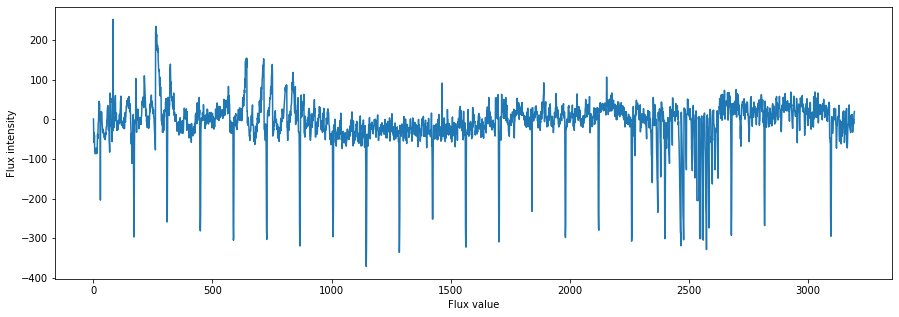

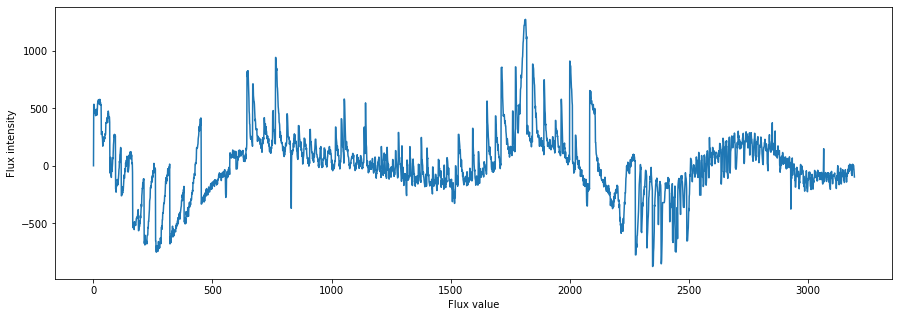

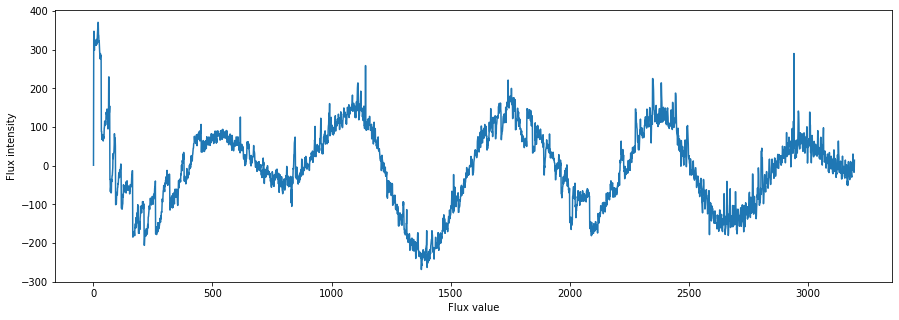

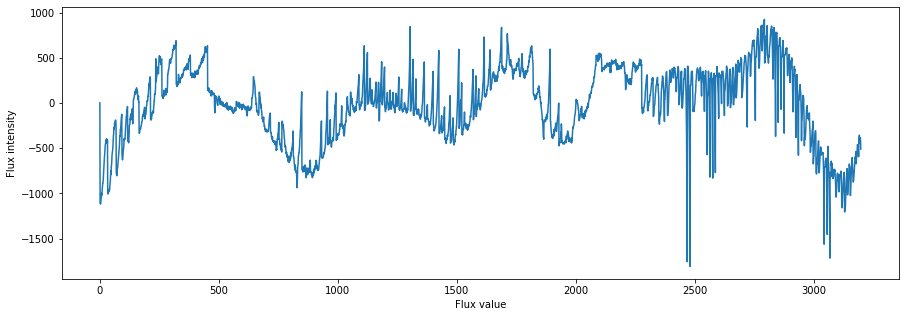

In [15]:
# Spectrum of Flux intensity for first 5 rows from exo_train.csv
for i in [0,1,2,3,4]:
    Y = exo_train.iloc[i]
    X = np.arange(len(Y))
    plt.figure(figsize=(15,5))
    plt.ylabel('Flux intensity')
    plt.xlabel('Flux value')
    plt.plot(X, Y)
    plt.show()

In [16]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
fig = make_subplots(rows=2, cols=2,subplot_titles=("Flux variation of star 37", "Flux variation of star 5086", 
                                                   "Flux variation of star 3000", "Flux variation of star 3001"))
fig.add_trace(
    go.Scatter(y=train_t_n[37], x=train_t_n.index),
    row=1, col=1
)
fig.add_trace(
    go.Scatter(y=train_t_n[5086], x=train_t_n.index),
    row=1, col=2
)
fig.add_trace(
    go.Scatter(y=train_t_n[3000], x=train_t_n.index),
    row=2, col=1
)
fig.add_trace(
    go.Scatter(y=train_t_n[3001], x=train_t_n.index),
    row=2, col=2
)
fig.update_layout(height=600, width=800, title_text="Non Exoplanets Star examples",showlegend=False)
fig.show()

ModuleNotFoundError: No module named 'plotly'